<a href="https://colab.research.google.com/github/ricardokendy/LinearRegression_Marketing/blob/main/ModeloDeRegress%C3%A3o_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [ ]:
upload = files.upload()

Saving MKT.csv to MKT (1).csv


In [ ]:
df = pd.read_csv('MKT.csv')

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


# **ETAPA 1 - ANÁLISE DESCRITIVA**

- O dataframe possui 4 colunas e 171 linhas de dados.
- Não apresenta nenhum dado nulo.
- Todos os dados são do tipo float64.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


# **ETAPA 2 - ANÁLISE EXPLORATÓRIA**
- Foi identificado outliers nos investimentos de newspaper
- Foi retirado os outliers
- Os dados apresentam uma correlação direta entre os investimentos com os valores de vendas

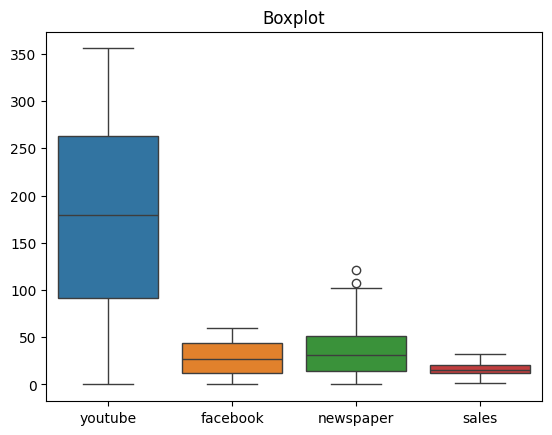

In [ ]:
# boxplot
ax = sns.boxplot(data=df)
plt.title("Boxplot", loc="center")
plt.show()

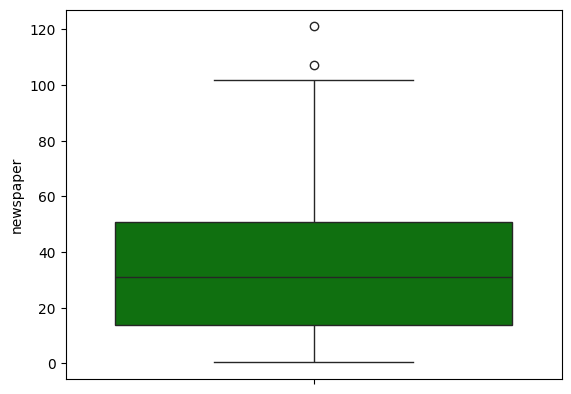

In [ ]:
sns.boxplot(df["newspaper"], color ='green');

In [ ]:
#linhas que apresentaram outliers no newspaper
df.sort_values('newspaper').tail(2)

,youtube,facebook,newspaper,sales
46,20.28,52.44,107.28,10.44
72,355.68,43.56,121.08,28.56


In [ ]:
#dropando os valores de outliers
df = df.drop(df[df["newspaper"] >= 107.28].index)

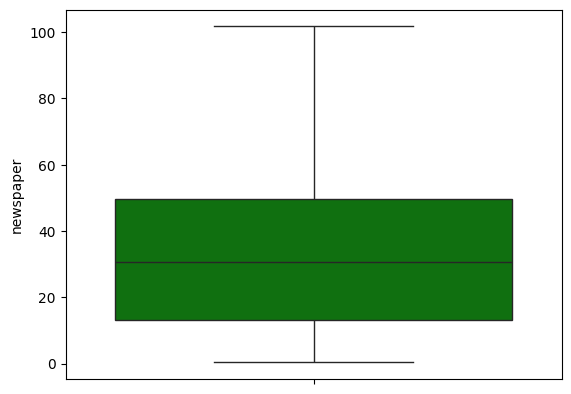

In [ ]:
sns.boxplot(df["newspaper"], color ='green');

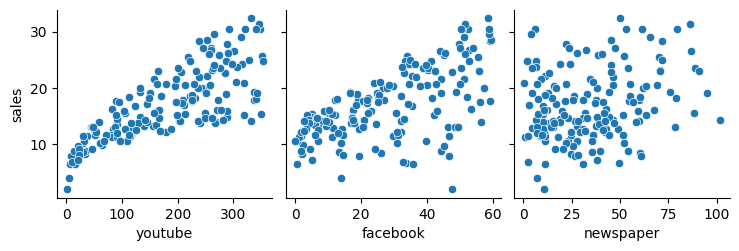

In [ ]:
sns.pairplot(df, x_vars=['youtube','facebook','newspaper'],y_vars='sales')

# **ETAPA 3 - MODELAGEM**

In [ ]:
X = df[['youtube','facebook','newspaper']]

In [ ]:
y = df[['sales']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=10) # 80% dos meus dados vão ser utilizados para treino e 20% para testes


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 3)
(34, 3)
(135, 1)
(34, 1)


In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train,y_train) # treinamento

LinearRegression()

# **ETAPA 4 - CALCULANDO PREDIÇÃO**

In [ ]:
y_pred = lm.predict(X_test) #teste

In [ ]:
r = r2_score(y_test, y_pred)

In [ ]:
print('r_quadrado:', r)


r_quadrado: 0.9099366429281196


Text(0, 0.5, 'vendas')

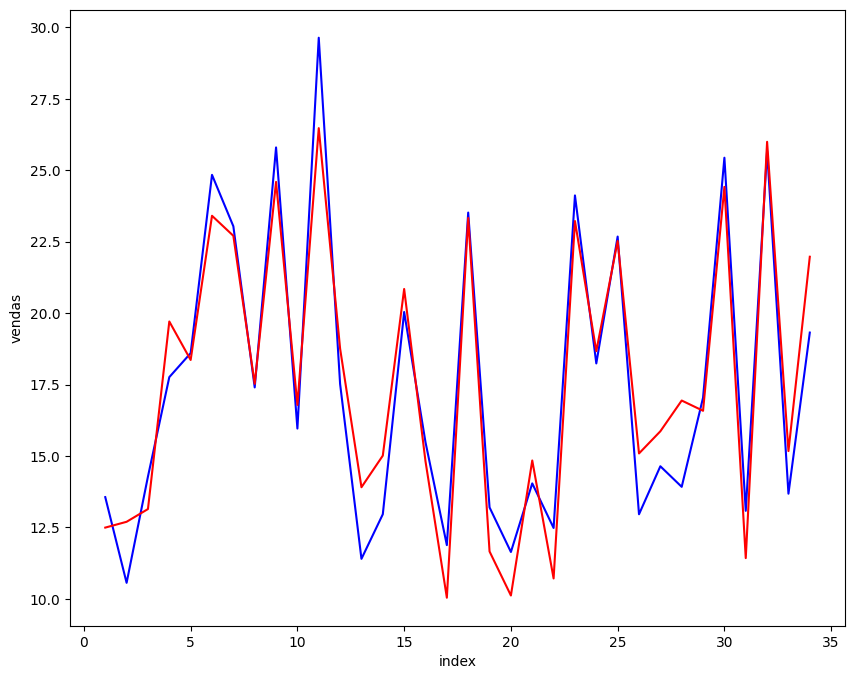

In [ ]:
c = [i for i in range(1, 35, 1)] #resultado real e preditivo da base
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_test, color='blue')
plt.plot(c, y_pred, color='red')
plt.xlabel('index')
plt.ylabel('vendas')

# **TESTANDO MODELO**

In [ ]:
youtube	= 80
facebook	= 30
newspaper = 40
entrada =  [[youtube,facebook,newspaper]]
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.12383122])